## Supplementary Figure 9

Goodness of fit clustering metrics

In [1]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(patchwork))

source("viz_themes.R")
source("plotting_functions.R")
source("data_functions.R")

In [2]:
output_figure_base <- file.path("figures", "supplementary", "supfigure9")
extensions <- c(".png", ".pdf")

In [3]:
results_dir <- file.path("..", "3.clustering-pca", "results")

## Panel A - Metrics

In [4]:
metric_all_df <- load_clustering_metrics(results_dir)

print(dim(metric_all_df))
head(metric_all_df)

[1] 156   5


cluster,metric_value,dose,assay,metric
<dbl>,<dbl>,<chr>,<chr>,<fct>
2,1.276867,common_compounds,L1000,Avg. Davies Bouldin score
3,3.063297,common_compounds,L1000,Avg. Davies Bouldin score
4,3.274531,common_compounds,L1000,Avg. Davies Bouldin score
5,3.033929,common_compounds,L1000,Avg. Davies Bouldin score
6,2.809097,common_compounds,L1000,Avg. Davies Bouldin score
7,2.756676,common_compounds,L1000,Avg. Davies Bouldin score


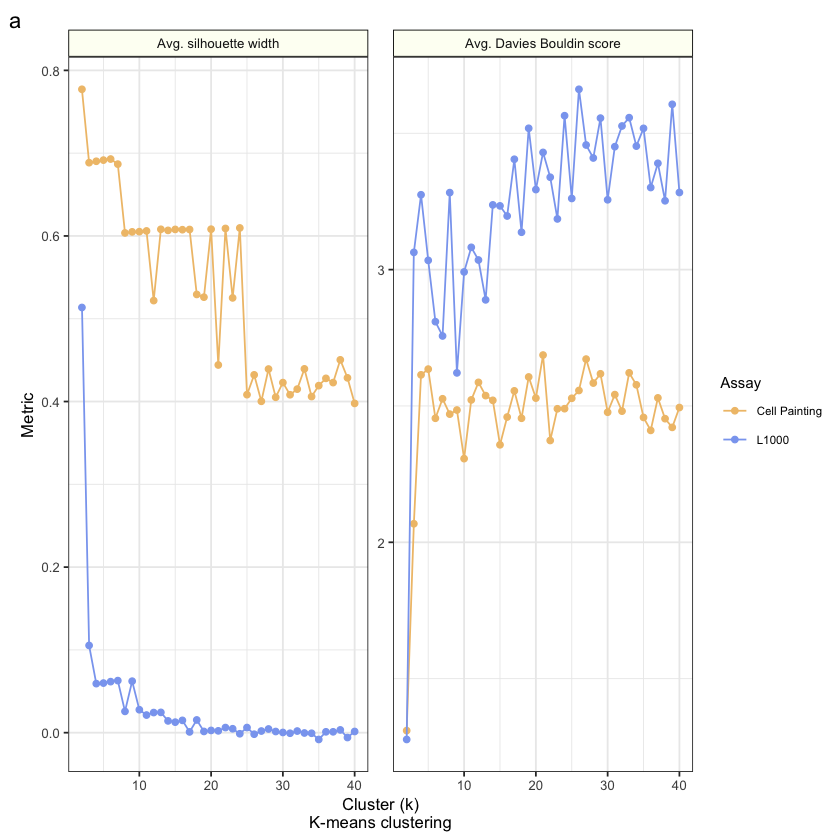

In [5]:
panel_a_gg <- (
    ggplot(metric_all_df, aes(x = cluster, y = metric_value, color = assay, group = assay))
    + geom_point()
    + geom_line()
    + facet_wrap("~metric", scales = "free_y")
    + scale_color_manual("Assay", values = assay_colors)
    + figure_theme
    + ylab("Metric")
    + xlab("Cluster (k)\nK-means clustering")
    + labs(tag = "a")
)

panel_a_gg

## Panel B - Metrics by Dose

In [6]:
metric_dose_df <- load_clustering_metrics(results_dir, file_suffix="")

metric_dose_df$dose <- dplyr::recode_factor(paste(metric_dose_df$dose), !!!recode_dose_factor_controls)

print(dim(metric_dose_df))
head(metric_dose_df)

[1] 936   5


cluster,metric_value,dose,assay,metric
<dbl>,<dbl>,<fct>,<chr>,<fct>
2,4.232601,0.04 uM,L1000,Avg. Davies Bouldin score
3,3.650064,0.04 uM,L1000,Avg. Davies Bouldin score
4,4.687886,0.04 uM,L1000,Avg. Davies Bouldin score
5,4.026151,0.04 uM,L1000,Avg. Davies Bouldin score
6,4.021898,0.04 uM,L1000,Avg. Davies Bouldin score
7,3.616325,0.04 uM,L1000,Avg. Davies Bouldin score


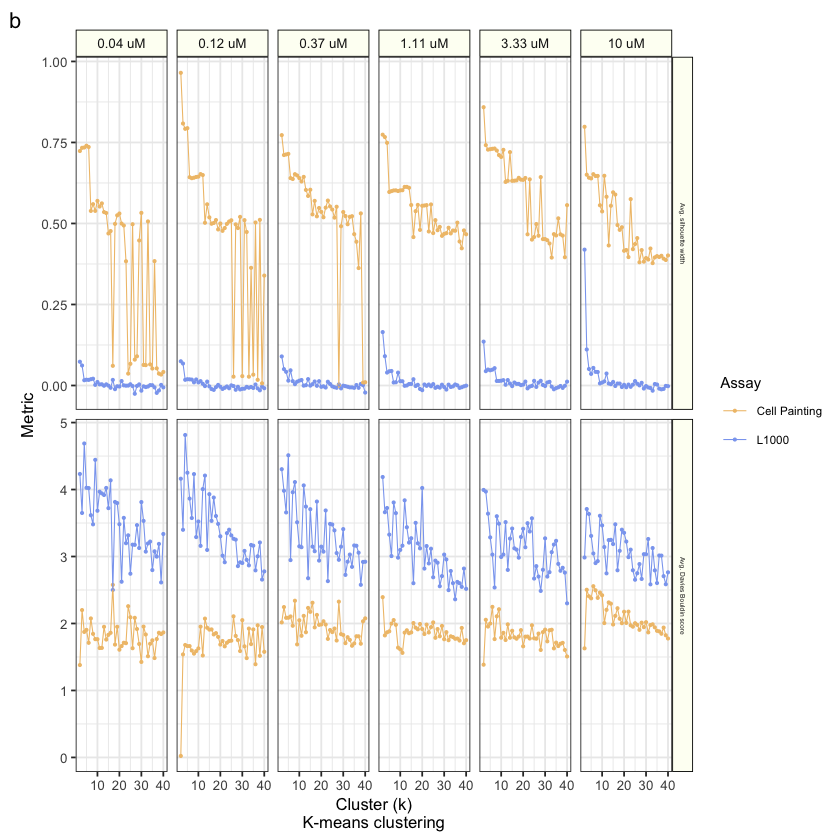

In [7]:
panel_b_gg <- (
    ggplot(metric_dose_df, aes(x = cluster, y = metric_value, color = assay, group = assay))
    + geom_point(size = 0.5)
    + geom_line(lwd = 0.3)
    + facet_grid("metric~dose", scales = "free_y")
    + scale_color_manual("Assay", values = assay_colors)
    + figure_theme
    + ylab("Metric")
    + xlab("Cluster (k)\nK-means clustering")
    + labs(tag = "b")
    + theme(
        strip.text.y = element_text(size = 4)
    )
)

panel_b_gg

## Panel C

In [8]:
# Load BIC scores
metric_bic_df <- load_clustering_metrics(results_dir, clustering = "gmm")

metric_bic_df$dose <- dplyr::recode_factor(paste(metric_bic_df$dose), !!!recode_dose_factor_controls)

print(dim(metric_bic_df))
head(metric_bic_df)

[1] 468   5


cluster,metric_value,dose,assay,metric
<dbl>,<dbl>,<fct>,<chr>,<chr>
2,5221834,0.04 uM,L1000,BIC Score
3,5736035,0.04 uM,L1000,BIC Score
4,6113923,0.04 uM,L1000,BIC Score
5,6484352,0.04 uM,L1000,BIC Score
6,6752009,0.04 uM,L1000,BIC Score
7,7176946,0.04 uM,L1000,BIC Score


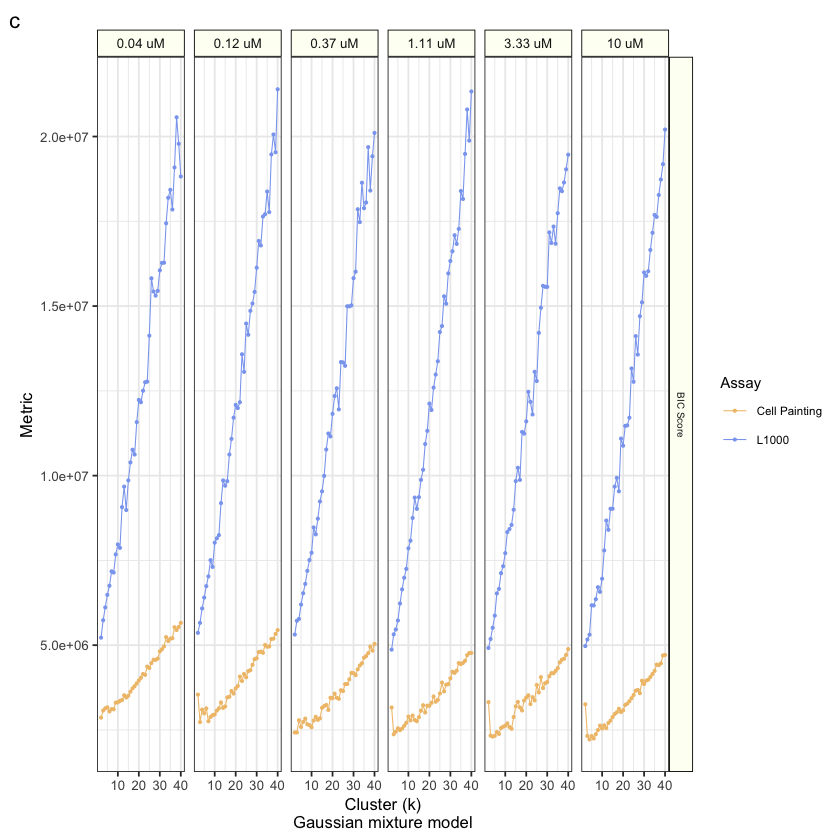

In [9]:
panel_c_gg <- (
    ggplot(metric_bic_df, aes(x = cluster, y = metric_value, color = assay, group = assay))
    + geom_point(size = 0.5)
    + geom_line(lwd = 0.3)
    + facet_grid("metric~dose", scales = "free_y")
    + scale_color_manual("Assay", values = assay_colors)
    + figure_theme
    + ylab("Metric")
    + xlab("Cluster (k)\nGaussian mixture model")
    + labs(tag = "c")
    + theme(
        strip.text.y = element_text(size = 6)
    )
)

panel_c_gg

## Compile figure

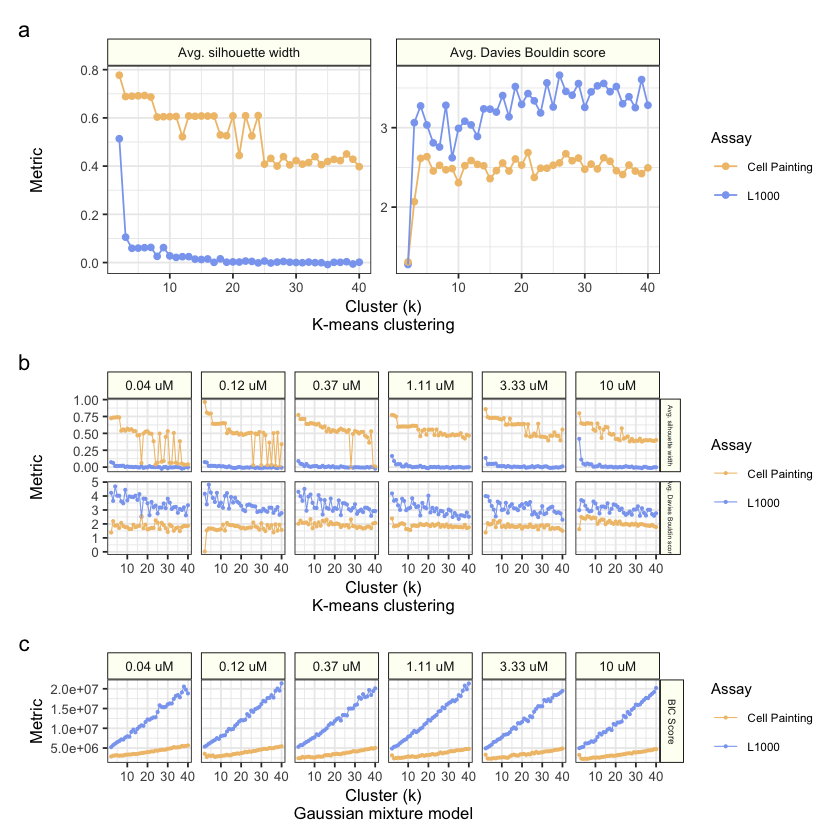

In [10]:
sup_fig9_gg <- (
    panel_a_gg / panel_b_gg / panel_c_gg
) + plot_layout(heights = c(1, 0.75, 0.4))

sup_fig9_gg

In [11]:
for (extension in extensions) {
    output_file <- paste0(output_figure_base, extension)
    ggplot2::ggsave(output_file, sup_fig9_gg, height = 7.5, width = 7, dpi = 500)
}